<a href="https://colab.research.google.com/github/wilmanAQ/AED/blob/main/Taller1_descripci%C3%B3n_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import google.colab as drive
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import altair as alt


**1. Contexto del análisis.**
La compañía de seguros de salud para la que trabajo. Quiere entender mejor cómo la competencia estima los costos para los seguros de la población fumadora. Me han pedido que investigar algunos datos históricos de la competencia para comprender qué características de la población fumadora resultan claves para nuestra compañía.


**2.Pregunta SMART.** Problema de negocio. Se quiere dar respuesta a la siguiente pregunta ¿**Cuál es el perfil de las personas fumadoras en relación con el costo de su seguro de salud, su región geográfica donde viven y sus características personales?**

3.Descripción de los datos incluyendo para cada columna: Variable: nombre de la variable. El conjunto de datos de las personas fumadora, tienen los siguientes atributos:

-**edad:** La edad de la persona, en años.

-**sexo:** Masculino o femenino.

-**imc:** El Índice de Masa Corporal (IMC) de la persona.

-**hijos:** el número de hijos que tiene la persona.

-**fumador:** Si la persona es fumadora o no.

-**región:** Noreste, noroeste, sureste, suroeste.

-**costo:** El costo del seguro de salud de esa persona.

-Tipo: tipo del formato de la variable. categórica, numérica, Booleana.


***Contexto***: información útil para entender el espacio semántico. 

Los datos que emplearemos para trabajar en este análisis son de carácter público, son de personas fumadoras, el costo de su seguro de vida, la región donde habitan y características personales. Todos los datos se encuentran en un archivo de Excel dataset_fumadores.xlsx.


***Expectativa***: ¿Por qué es importante esta variable para mi problema? 

Se espera conocer las características de las personales fumadoras, el costo de su seguro de vida y la región geográfica donde habitan. 


***Importancia***:

Analizar a la competencia para entender como estima los costos para los seguros de la población fumadora.

#Análisis general del dataset fumadores:

-	***Forma y tamaño del dataset fumadores***: 
 
  El tamaño y la forma es (1338, 7)

- ***Evaluación de los nombres de las variables***:

Los nombres de las variables hacen referencia a la información que está en el dataset fumadores. No se encuentra incoherencia en los atributos, es decir la información es confiable e integra. 
- ***Revisión de los tipos de variables***:

En la revisión de los tipos de variables se pudo evidenciar los siguientes tipos de variables:  ***Object, Int64, Float64***
- **edad**    float64
- **sexo**    Object
- **imc**     float64
- **hijos**   int64
- **Fumador** Object
- ***Región** Object
- ***Costo*** float

#Análisis Unitario :

-	**Identificar Valores Nulos**.

No hay valores nulos en la dataset fumadores.

-**Analizar los Valores únicos de las variables discretas**.

-**Analizar la distribución de las variables continuas**.

-**Evaluar la necesidad de usar Label encoding y/o  hot-encoding**
Se encontró la necesidad de aplicar hot-encoding a las variables sexo, región y fumador. Ya que estas son variables cualitativas nominal y, no se puede aplicar un orden especifico


In [99]:
# Cargo el link del dataset
bd ='/content/drive/MyDrive/Colab Notebooks/Analisis_exploratorio_datos/dataset_fumadores.xlsx'
# Asigno los encabezado
headers = ["edad","sexo","imc","hijos","fumador", "region","costo"]
# Asigno la data y el encabezado
data = pd.read_excel(bd, names=headers)
# Leo las 5 primeras lineas del la data
data.head(5)

,edad,sexo,imc,hijos,fumador,region,costo
0,19,femenino,27.900,0,si,suroeste,16884.92400
1,18,masculino,33.770,1,no,sureste,1725.55230
2,28,masculino,33.000,3,no,sureste,4449.46200
3,33,masculino,22.705,0,no,noroeste,21984.47061
4,32,masculino,28.880,0,no,noroeste,3866.85520


In [100]:
#data.describe(include ='all')

In [101]:
#data.describe()

In [102]:
#print(data.dtypes)

In [103]:
# Vemos la forma de la data
data.shape

(1338, 7)

In [104]:
#Observamos los tipo de datos
#print(data.dtypes)

In [148]:
#data.isna().sum()

In [106]:
#verificamos los encabezado de la data
#data.columns

In [107]:
data.dtypes

edad         int64
sexo        object
imc        float64
hijos        int64
fumador     object
region      object
costo      float64
dtype: object

### Remplazando valore perdidos

In [108]:
# Reemplazar "?" por NaN, notengo valores perdidos
#data.replace("?", np.nan, inplace = True)
#data.head(5)

## Evaluando los datos

In [109]:
#missing_data = data.isnull()
#missing_data.head(5)

Contar los valores perdidos de cada columna

In [110]:
#for column in missing_data.columns.values.tolist():
 #   print(column)
 #   print (missing_data[column].value_counts())
 #   print("")    

Para contar los valores perdidos que hay en cada atributo.

El resumen de los valores perdidos para los atributos del dataset.
 (.isnull(), .notnull(), y .isna()).) despues .sum() 

In [111]:
data.isna().sum()

edad       0
sexo       0
imc        0
hijos      0
fumador    0
region     0
costo      0
dtype: int64

##Corregir formato de datos

In [112]:
#Cambiamos los formatos de los atributos  
data[["edad"]] = data[["edad"]].astype("int")
data[["imc"]] = data[["imc"]].astype("float")
data[["hijos"]] = data[["hijos"]].astype("int")
data[["costo"]] = data[["costo"]].astype("float")

#Estandarización de los tipo de datos
La fórmula para la conversión es: L/100km = 235 / mpg

In [113]:
#Ejemplo
#data[''] = 235/data[""]

## Normalizar la colunmas

In [114]:
# NOrmalizamos los atributos para que queden entre 0 y 1
data['edad'] = data['edad']/data['edad'].max()
data['imc'] = data['imc']/data['imc'].max()
data['costo'] = data['costo']/data['costo'].max()

##Discretizar valores
### Sin aplicar

In [115]:
#data.head(5)
#data.tail(5)

##Variable indicadora (o variable ficticia)

In [116]:
dummy_variable_1 = pd.get_dummies(data["sexo"])
#dummy_variable_1.head(50)

In [117]:
dummy_variable_1.rename(columns={'femenino':'genero-femenino', 'masculino':'genero-masculino'}, inplace=True)
#dummy_variable_1.head()

In [150]:
#data.describe()

In [119]:
#from google.colab import files
#data.to_excel("dataset_fumadores.xlsx")
#files.download("dataset_fumadores.xlsx")

In [151]:
#miramos numero duplicado
data.duplicated().sum()
     

1

In [158]:
#para contar las veces que se repiete un valor
#data.hijos.value_counts()

In [159]:
#data.hijos.value_counts("normalize = True")
     

Text(0, 0.5, 'Total Hijos')

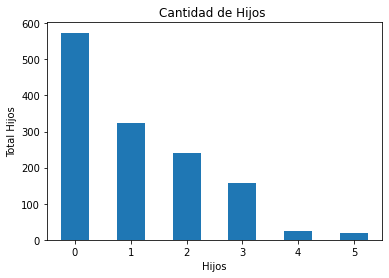

In [160]:
data.hijos.value_counts().plot(kind="bar")
plt.title("Cantidad de Hijos ")
plt.xlabel("Hijos")
plt.xticks(rotation=0)
plt.ylabel("Total Hijos")
#plt.show()

##One_hot_encodign

In [124]:

print(data.info)

<bound method DataFrame.info of           edad       sexo       imc  hijos fumador    region     costo
0     0.296875   femenino  0.525127      0      si  suroeste  0.264777
1     0.281250  masculino  0.635611      1      no   sureste  0.027059
2     0.437500  masculino  0.621118      3      no   sureste  0.069773
3     0.515625  masculino  0.427348      0      no  noroeste  0.344744
4     0.500000  masculino  0.543572      0      no  noroeste  0.060637
...        ...        ...       ...    ...     ...       ...       ...
1333  0.781250  masculino  0.582910      3      no  noroeste  0.166230
1334  0.281250   femenino  0.600791      0      no   noreste  0.034593
1335  0.281250   femenino  0.693582      0      no   sureste  0.025558
1336  0.328125   femenino  0.485601      0      no  suroeste  0.031487
1337  0.953125   femenino  0.547149      0      si  noroeste  0.456973

[1338 rows x 7 columns]>


In [125]:
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder

# Creamos el objeto
onehotencoder = OneHotEncoder()

#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 



In [126]:
S = onehotencoder.fit_transform(data.sexo.values.reshape(-1,1)).toarray()
S


array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [127]:
dfOneHotS = pd.DataFrame(S, columns = ["sexo"+str(int(i)) for i in range(S.shape[1])]) 

In [128]:
df = pd.concat([data, dfOneHotS], axis=1)
#df

In [129]:
F = onehotencoder.fit_transform(data.fumador.values.reshape(-1,1)).toarray()
F

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [130]:
dfOneHotF = pd.DataFrame(F, columns = ["fumador"+str(int(i)) for i in range(S.shape[1])]) 

In [131]:
data = pd.concat([data,dfOneHotS, dfOneHotF,], axis=1)
#data

In [132]:
data= data.drop(['sexo','fumador'], axis=1) 
data.head(5)

,edad,imc,hijos,region,costo,sexo0,sexo1,fumador0,fumador1
0,0.296875,0.525127,0,suroeste,0.264777,1.0,0.0,0.0,1.0
1,0.281250,0.635611,1,sureste,0.027059,0.0,1.0,1.0,0.0
2,0.437500,0.621118,3,sureste,0.069773,0.0,1.0,1.0,0.0
3,0.515625,0.427348,0,noroeste,0.344744,0.0,1.0,1.0,0.0
4,0.500000,0.543572,0,noroeste,0.060637,0.0,1.0,1.0,0.0


In [133]:
data = data.dropna()

In [134]:
data.head(5)

,edad,imc,hijos,region,costo,sexo0,sexo1,fumador0,fumador1
0,0.296875,0.525127,0,suroeste,0.264777,1.0,0.0,0.0,1.0
1,0.281250,0.635611,1,sureste,0.027059,0.0,1.0,1.0,0.0
2,0.437500,0.621118,3,sureste,0.069773,0.0,1.0,1.0,0.0
3,0.515625,0.427348,0,noroeste,0.344744,0.0,1.0,1.0,0.0
4,0.500000,0.543572,0,noroeste,0.060637,0.0,1.0,1.0,0.0


In [135]:
Re = onehotencoder.fit_transform(data.region.values.reshape(-1,1)).toarray()
Re

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [136]:
dfOneHotRe = pd.DataFrame(Re, columns = ["region"+str(int(i)) for i in range(Re.shape[1])])

In [137]:
data = pd.concat([data,dfOneHotRe], axis=1)

In [138]:
data= data.drop(['region'], axis=1) 

In [139]:
#data.head(5)

#Análisis descritivo de la distribución de los datos



In [146]:
data.describe(include='all')

,edad,imc,hijos,costo,sexo0,sexo1,fumador0,fumador1,region0,region1,region2,region3
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.612610,0.577139,1.094918,0.208097,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,0.219531,0.114779,1.205493,0.189900,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,0.281250,0.300395,0.000000,0.017592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.421875,0.494942,0.000000,0.074334,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.609375,0.572181,1.000000,0.147122,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.796875,0.652997,2.000000,0.260935,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


En el resumen estadistíco se observa que el promedio de las personas fuamdora es 20%, de las no fumadoras es 80%, con desviación estándar de 0.40, que la edad promedio entre las personas fumadoras es 61 años, las edad minima de la persona fumadora mas joven es de 28 años y la mayor es 100 años. El 25% de las personas tiene una edad 28 años, el 50% de la personas fumadora tienen en 28 y 60 años, el otro 50% esta comprendiso entre 60 a 100 años. El 75% de los fumadores tienen 79 años o más. El 20% de los fumadores habitan en el suroeste. el promedio de los hombre fumadores es 49.4%.

In [142]:
# Calculamos Variance Inflation Factor(VIF).
# Cuantifica la  multicolinealidad en un análisis de regresión normal de mínimos cuadrados.
# VIF=1, Baja Multicollinearidad
# VIF=1 VIF<5, Moderada Multicollinearidad
# VIF=1 VIF>5, Multicollinearity Extrema (Se busca evitar)

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [143]:
# Seleccionamos las variables que vamos a analizar 
X = data[['costo','fumador0', 'fumador1']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

    feature       VIF
0     costo  2.629951
1  fumador0  2.015228
2  fumador1  4.775201


In [144]:
X = data[['edad','fumador0', 'fumador1']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

    feature       VIF
0      edad  1.000626
1  fumador0  7.257504
2  fumador1  2.540961
